In [1]:
import mglearn 
import matplotlib.pyplot as plt 
import numpy as np 
import IPython 
import sklearn 

## Forge - A Simple Dataset

X.shape: (26, 2)


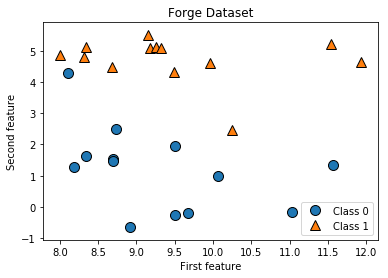

In [7]:
# generate dataset 
X, y = mglearn.datasets.make_forge() 
# plot dataset 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.title('Forge Dataset')
plt.legend(["Class 0", "Class 1"], loc=4) 
plt.xlabel("First feature") 
plt.ylabel("Second feature") 
print("X.shape: {}".format(X.shape))

### Plot for n_neighbors = 1

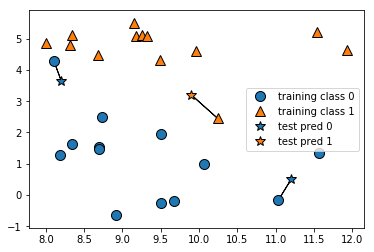

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)


### Hands on: Plot for n_neighbors = 2

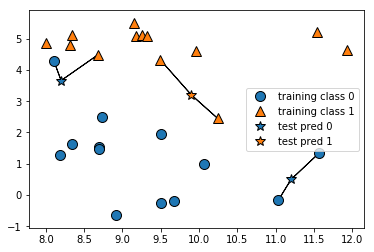

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=2)


### Split the Forge dataset into a training and a test set

In [12]:
from sklearn.cross_validation import train_test_split
[x_train,x_test,y_train,y_test] = train_test_split(X,y,random_state=0)


### Instantiate the KNN model and set the number of neighbors to 3 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

### Fit the model using the training data and training targets

In [30]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Find the test set predictions and test set accuracy

In [31]:
print("Test set predictions : {}".format(clf.predict(x_test)))
print("y test : {}".format(y_test))

Test set predictions : [1 0 1 0 1 0 0]
y test : [1 0 1 0 1 1 0]


In [32]:
print("Test score:{:.2f}".format(clf.score(x_test,y_test)))

Test score:0.86


### Plot KNN classification for n_neighbors = 3

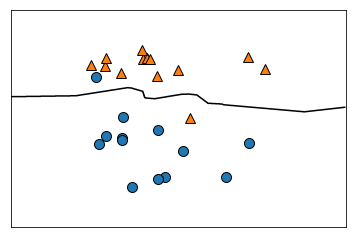

In [34]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(clf, X)

### Comparison of KNN model for different values of n_neighbors

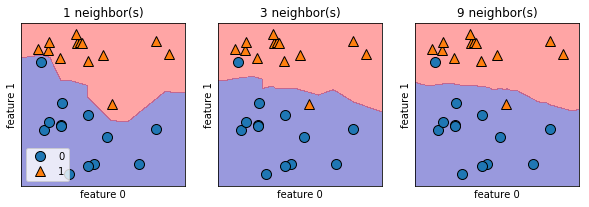

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):    
    # the fit method returns the object self, so we can instantiate    
    # and fit in one line    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)    
    ax.set_title("{} neighbor(s)".format(n_neighbors))    
    ax.set_xlabel("feature 0")    
    ax.set_ylabel("feature 1") 
axes[0].legend(loc=3)


## Cancer Dataset

In [36]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['feature_names', 'target_names', 'DESCR', 'data', 'target'])


In [37]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [40]:
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'benign': 357, 'malignant': 212}


In [41]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Hands on: Cancer Dataset - Training vs Test Accuracy

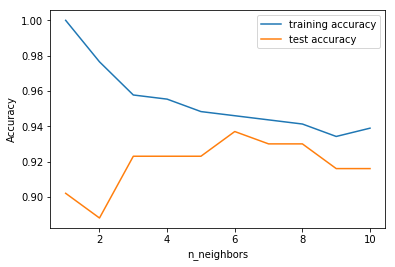

In [44]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 
X = cancer.data
y = cancer.target

# Use the same variable names as the previous example wherever required
# Split the Cancer dataset into a training and a test set
# Set the parameters random_state = 66 and stratify = y

[x_train,x_test,y_train,y_test] = train_test_split(X,y,random_state=66,stratify=y)

training_accuracy = [] 
test_accuracy = [] 
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train,y_train)
    # record training set accuracy    
    training_accuracy.append(clf.score(x_train,y_train))    
    # record generalization accuracy    
    test_accuracy.append(clf.score(x_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("n_neighbors") 
plt.legend() 